In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [3]:
using StatsBase, Distributions, Plots, LinearAlgebra

In [26]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [27]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [28]:
n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)

1000×1 Matrix{Int64}:
 1
 1
 1
 1
 2
 1
 1
 1
 2
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [29]:
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.116372   0.0235024
  0.229922   0.0413387
  0.164816   0.0603769
  0.166257   0.0937543
  0.128623   0.208367
  0.206785   0.184135
  0.208147   0.138996
  0.243929   0.13419
 -0.0793273  0.139545
  0.256605   0.0796758
  ⋮          
  0.137348   0.111994
  0.123716   0.134618
  0.115982   0.0754035
  0.0333124  0.0503828
  0.127893   0.093635
  0.346317   0.0977663
  0.197276   0.0951551
  0.112754   0.115862
  0.166051   0.104218

In [30]:
Y = collect(test_returns)
T = n_samples
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


999×2 Matrix{Float64}:
 0.913913   0.0860866
 0.936764   0.0632364
 0.814382   0.185618
 0.380724   0.619276
 0.777531   0.222469
 0.888813   0.111187
 0.748797   0.251203
 0.0493994  0.950601
 0.41393    0.58607
 0.758478   0.241522
 ⋮          
 0.965323   0.0346769
 0.956161   0.0438391
 0.97922    0.0207803
 0.954564   0.0454356
 0.928369   0.0716309
 0.881276   0.118724
 0.97265    0.0273497
 0.949527   0.050473
 0.938726   0.061274

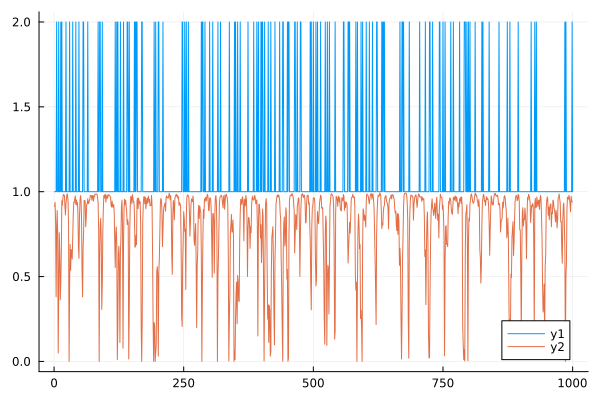

In [31]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


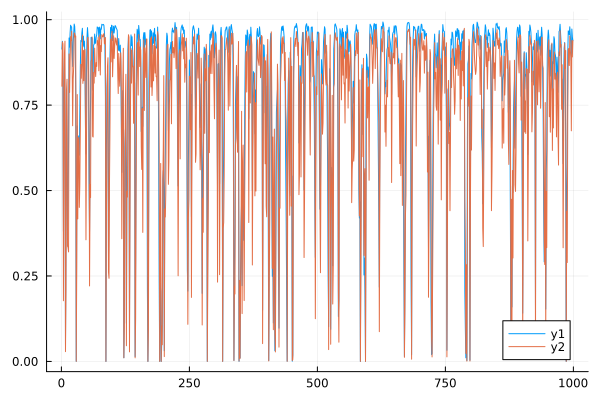

In [32]:
plot(smoothed_regimes[:,1])
plot!(est_regimes[:,1])

- Β1 = [.09 .3 .2; .03 .1 .6] 
- Σ1 = cor2cov([1 .3; .3 1], [.08, .03]) 
- Β2 = [-.02 .35 .25; .035 .15 .63] 
- Σ2 = cor2cov([1 .35; .35 1], [.18, .035]) 

In [33]:
coef, cov_matrix = est_regimes_params(Y[2:end,:], X, smoothed_regimes)

display(round.(coef[1]', digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

2×3 Matrix{Float64}:
 0.1064  0.2874  0.181
 0.0275  0.0917  0.6798

2×2 Matrix{Float64}:
 1.0     0.3407
 0.3407  1.0

2-element Vector{Float64}:
 0.0792
 0.034

In [34]:
display(round.(coef[2]', digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

2×3 Matrix{Float64}:
 -0.0482  0.054   0.9303
  0.0461  0.1971  0.8179

2×2 Matrix{Float64}:
 1.0    0.697
 0.697  1.0

2-element Vector{Float64}:
 0.1735
 0.053

In [35]:
est_transition_matrix(smoothed_regimes, initial_states)

2×2 Matrix{Float64}:
 0.00268917  0.000657861
 0.00138525  0.000266706

In [58]:
tm = est_transition_matrix(er, states_zero)

2×2 Matrix{Float64}:
 0.510516  0.124515
 0.412396  0.113399

In [55]:
ones(2)' * Matrix(I, 2,2)

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  1.0

#TODO 
- sas

In [37]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#- zrobić testy stabilne, np seed lub porwnanie rozkładow
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

BETA coefficient
 
#Beta and intercept time varing

In [38]:
Y = [.16 .05; .13 .045; .07 .03; .08 .035; .11 .04]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045; 1. .07 .03; 1. .11 .04]

regimes_probs = [.9 .1; .8 .2; .7 .3; .7 .3; .8 .2]


5×2 Matrix{Float64}:
 0.9  0.1
 0.8  0.2
 0.7  0.3
 0.7  0.3
 0.8  0.2

In [39]:
regime_matrix = diagm(regimes_probs[:,1])
Xhat = calc_xhat(X, regime_matrix) 
Β1 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ1 = calc_cov_matrix(U, regime_matrix)

display(round.(Β1, digits=4))
display(round.(cov2cor(Σ1), digits=4))
display(round.(std(Σ1), digits=4))

3×2 Matrix{Float64}:
  0.0197   0.0284
 -0.1873  -0.0301
  2.8309   0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

0.0001

In [40]:
regime_matrix = diagm(regimes_probs[:,2])
Xhat = calc_xhat(X, regime_matrix) 
Β2 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ2 = calc_cov_matrix(U, regime_matrix)

display(round.(Β2, digits=4))
display(round.(cov2cor(Σ2), digits=4))
display(round.(sqrt.(diag(Σ2)), digits=4))

3×2 Matrix{Float64}:
 -0.1316  -0.0073
 -2.5617  -0.7141
 14.9374   3.9496

2×2 Matrix{Float64}:
 1.0     0.9877
 0.9877  1.0

2-element Vector{Float64}:
 0.0535
 0.0184

In [41]:
coef, cov_matrix = est_regimes_params(Y, X, regimes_probs)

display(round.(coef[1], digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

3×2 Matrix{Float64}:
  0.0197   0.0284
 -0.1873  -0.0301
  2.8309   0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

2-element Vector{Float64}:
 0.0157
 0.0037

In [42]:
display(round.(coef[2], digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

3×2 Matrix{Float64}:
 -0.1316  -0.0073
 -2.5617  -0.7141
 14.9374   3.9496

2×2 Matrix{Float64}:
 1.0     0.9999
 0.9999  1.0

2-element Vector{Float64}:
 0.0309
 0.0088

In [63]:

regimes = [.6 .4;.75 .25; .9 .1; .9 .1; .8 .2]
r0 = [.66, .34] # initial regimes probs
s = sum(regimes, dims=1)
k = kron([1, 1], s[1,:])

4-element Vector{Float64}:
 3.95
 1.05
 3.95
 1.05

In [68]:
#transition probs from probs of regimes

k2 = [kron(r0, regimes[1,:]), kron(regimes[1,:], regimes[2,:]), kron(regimes[2,:], regimes[3,:])]
k2sum = sum(k2, dims=1)[1]



4-element Vector{Float64}:
 1.521
 0.48900000000000005
 0.729
 0.261

In [69]:
r = k2sum ./ k
r = reshape(r, (2,2))

2×2 Matrix{Float64}:
 0.385063  0.184557
 0.465714  0.248571

In [61]:
sum(r, dims=2)

2×1 Matrix{Float64}:
 0.5696202531645569
 0.7142857142857143

In [44]:
est_transition_matrix(regimes, r0)

2×2 Matrix{Float64}:
 0.676  0.324
 0.652  0.348

In [98]:
vec(transition_matrix) .* kron(smoothed_regimes[2,:] ./ est_regimes[2,:], est_regimes[1,:]) 

4-element Vector{Float64}:
 0.6856243448823266
 0.03903376682377971
 0.11766969913757228
 0.15184711133232687

In [100]:
transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

er = expected_regimes(states_zero,transition_matrix, 5)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [118]:
result = zeros(5,4)
result[1,:] = kron(er[1,:], states_zero)
T = size(result)[1]

for t in 2:T
    result[t,:] = kron(er[t,:], er[t-1,:])
end

k2 = result

5×4 Matrix{Float64}:
 0.7065    0.0785    0.1935    0.0215
 0.557546  0.152704  0.227454  0.0622963
 0.469946  0.191717  0.240304  0.0980333
 0.416901  0.21318   0.244762  0.125158
 0.384067  0.225485  0.246013  0.144434

In [138]:
kron(Matrix(I, 4, 4), ones(2))

8×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0

In [136]:
k1 = kron(ones(2), states_zero + vec(sum(er, dims=1)))

sum(k2)[1] ./ k1

4-element Vector{Float64}:
 1.1637255938831732
 2.9352120010985763
 1.1637255938831732
 2.9352120010985763

In [153]:

transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

regimes  = expected_regimes(states_zero, transition_matrix,  5)

smoothed_regimes = smoother(regimes, transition_matrix)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [163]:
vec(transition_matrix)

4-element Vector{Float64}:
 0.85
 0.2
 0.15
 0.8

In [165]:
.61 * .85

0.5185

In [171]:
using Test

In [194]:
jr = joined_regimes_probs(regimes, smoothed_regimes, states_zero, transition_matrix)
jr_sum = sum(jr, dims=1)


1×4 Matrix{Float64}:
 3.13394  0.262601  0.553049  1.05041

In [216]:
s = sum(regimes[1:end-1,:], dims=1)[1,:] + states_zero

k = kron([1, 1], s)


4-element Vector{Float64}:
 3.686993125
 1.3130068750000004
 3.686993125
 1.3130068750000004

In [217]:
e_tm = jr_sum[1,:] ./ k
e_tm = reshape(e_tm, 2, 2)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [218]:
sum(e_tm, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [191]:
sum(jr, dims=2) .≈ 1 

5×1 BitMatrix:
 1
 1
 1
 1
 1

In [222]:
est_transition_matrix(jr, regimes, states_zero)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8